In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/annual-temperature-anomalies.csv')

In [3]:
df.head()

,Entity,Code,Year,Temperature anomaly
0,Afghanistan,AFG,1940,-1.202316
1,Afghanistan,AFG,1941,0.794745
2,Afghanistan,AFG,1942,0.355437
3,Afghanistan,AFG,1943,-1.005242
4,Afghanistan,AFG,1944,-0.386346


In [19]:
selected_countries = ['BRA', 'MEX', 'CHL', 'ECU', 'CAN']

# Filter the DataFrame to include only the selected countries
df2 = df[df['Code'].isin(selected_countries)].copy()

# Display the resulting DataFrame (optional)
print(df2.head())

      Entity Code  Year  Temperature anomaly
2550  Brazil  BRA  1940            -0.765970
2551  Brazil  BRA  1941            -0.408445
2552  Brazil  BRA  1942            -0.720680
2553  Brazil  BRA  1943            -1.458900
2554  Brazil  BRA  1944            -0.696214


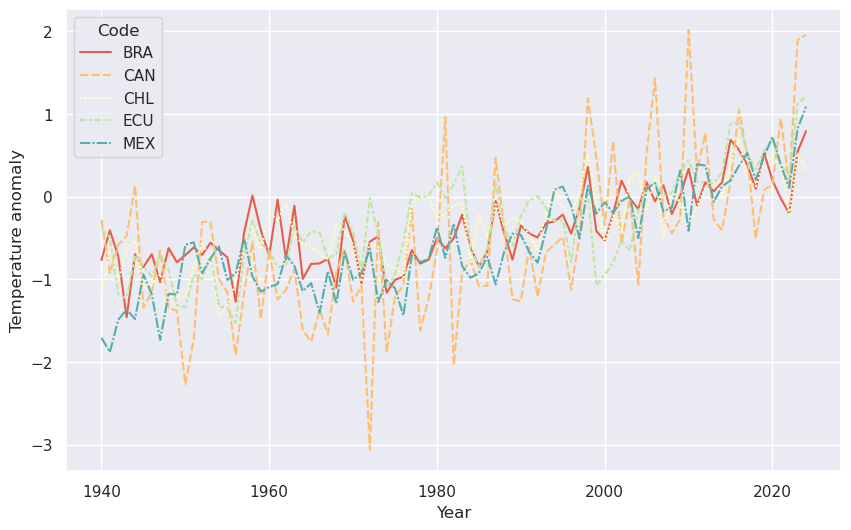

In [43]:
from matplotlib.ticker import MaxNLocator
#sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,6))

# Plot the responses for different events and regions
ax = sns.lineplot(  
    x="Year", y="Temperature anomaly",
    palette="Spectral",
    hue="Code", 
    style="Code",
    data=df2)
#lt.gca().xaxis.set_major_locator(MaxNLocator(nbins=8))
plt.xticks([1940, 1960, 1980, 2000, 2020])
plt.show()

/tmp/ipykernel_48802/3606180325.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




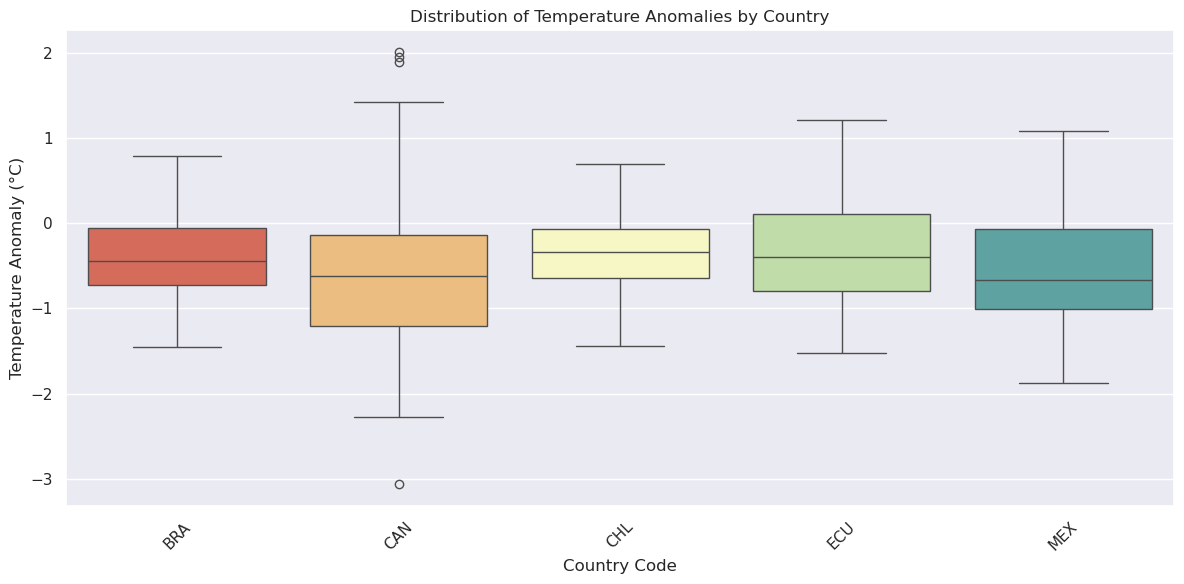

In [46]:
plt.figure(figsize=(12, 6))

# Create the boxplot
ax = sns.boxplot(
    x="Code", 
    y="Temperature anomaly",
    data=df2,
    palette="Spectral",
    
)

# Customize the plot
plt.title("Distribution of Temperature Anomalies by Country")
plt.xlabel("Country Code")
plt.ylabel("Temperature Anomaly (°C)")
plt.xticks(rotation=45)  # Rotate country codes for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

In [53]:
import plotly.express as px

fig = px.scatter(
    df2,
    x="Year",
    y="Temperature anomaly",
    color="Code",               # Cores por país
    hover_name="Code",          # Mostra o nome do país ao passar o mouse
    title="Anomalias de Temperatura por País ao Longo do Tempo",
    labels={"Temperature anomaly": "Anomalia (°C)", "Year": "Ano"},
    width=1000,
    height=600,
    #template="plotly_dark",     # Estilo escuro (opcional)
)

# Personalizar tooltip (informações ao passar o mouse)
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>Ano: %{x}<br>Anomalia: %{y}°C",
    marker=dict(size=10, opacity=0.7, line=dict(width=1, color="white"))
)

# Adicionar controles de zoom e seleção
fig.update_layout(
    hovermode="closest",        # Melhor interação ao passar o mouse
    xaxis=dict(tickmode="linear", dtick=10),  # Marcadores a cada 10 anos
    plot_bgcolor="rgba(0,0,0,0.1)",  # Fundo transparente
)

fig.show()